Coding exercise 0402

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')           
%matplotlib inline

In [2]:
df = sns.load_dataset('iris')
X = df.drop(columns=['species'])                      
Y = df['species']                                     
header_X = X.columns                                 
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
kmeans = KMeans(n_clusters=3, random_state=123)        
kmeans.fit(X)                                           
res = pd.Series(kmeans.labels_)                         

In [4]:
case0 = Y[res==0]
print(case0.value_counts())

species
virginica     36
versicolor     2
Name: count, dtype: int64


In [5]:
case1 = Y[res==1]
print(case1.value_counts())

species
setosa    50
Name: count, dtype: int64


In [6]:
case2 = Y[res==2]
print(case2.value_counts())

species
versicolor    48
virginica     14
Name: count, dtype: int64


In [7]:
learnedLabels = ['Virginica','Setosa','Versicolor']  

In [8]:
np.round(pd.DataFrame(kmeans.cluster_centers_,columns=header_X,index=['Cluster 0','Cluster 1','Cluster 2']),2)

,sepal_length,sepal_width,petal_length,petal_width
Cluster 0,6.85,3.07,5.74,2.07
Cluster 1,5.01,3.43,1.46,0.25
Cluster 2,5.90,2.75,4.39,1.43


In [9]:
type(case0)

pandas.core.series.Series

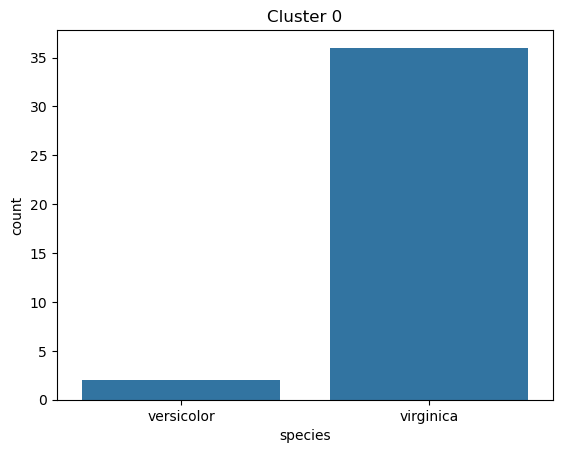

In [10]:
sns.countplot(x=case0).set_title('Cluster 0')
plt.show()

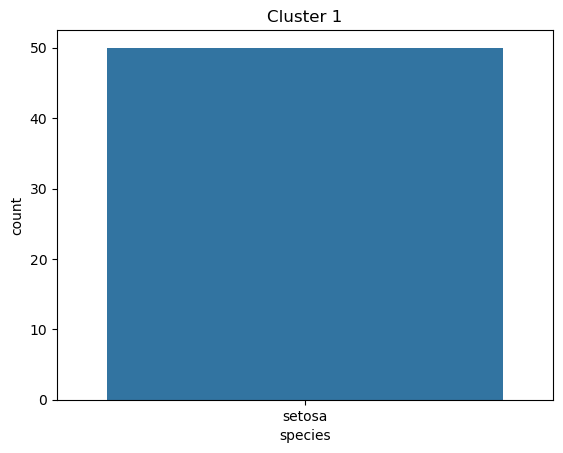

In [11]:
sns.countplot(x=case1).set_title('Cluster 1')
plt.show()

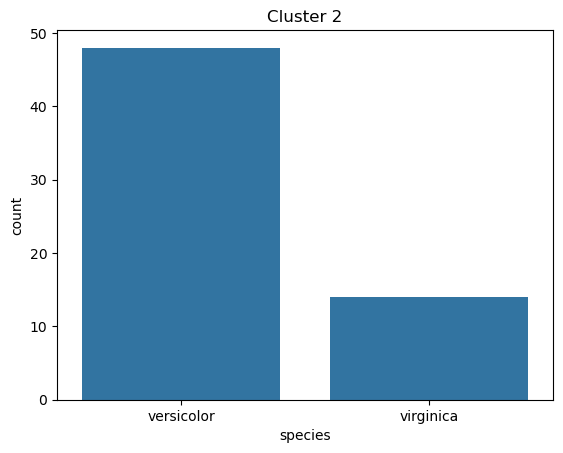

In [12]:
sns.countplot(x=case2).set_title('Cluster 2')
plt.show()

In [13]:
X_test = {'sepal_length': [7.0] ,'sepal_width': [3.0] , 'petal_length': [5.0]  ,'petal_width': [1.5] }  
X_test = pd.DataFrame(X_test)
predCluster = kmeans.predict(X_test)[0]
print("Predicted cluster {} with the most probable label '{}'".format(predCluster,learnedLabels[predCluster]))

Predicted cluster 0 with the most probable label 'Virginica'


In [14]:
X_test = {'sepal_length': [4.5] ,'sepal_width': [3.0] , 'petal_length': [1.0]  ,'petal_width': [1.0] } 
X_test = pd.DataFrame(X_test)
predCluster = kmeans.predict(X_test)[0]
print("Predicted cluster {} with the most probable label '{}'".format(predCluster,learnedLabels[predCluster]))

Predicted cluster 1 with the most probable label 'Setosa'


In [15]:
X_test = {'sepal_length': [6.0] ,'sepal_width': [3.0] , 'petal_length': [4.0]  ,'petal_width': [1.0] }   
X_test = pd.DataFrame(X_test)
predCluster = kmeans.predict(X_test)[0]
print("Predicted cluster {} with the most probable label '{}'".format(predCluster,learnedLabels[predCluster]))

Predicted cluster 2 with the most probable label 'Versicolor'
